# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [2]:
!pip install ydata-profiling ipywidgets phik

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import ipywidgets
import phik
from ydata_profiling import ProfileReport
from IPython.display import clear_output 
#Добавим модуль IPython, ipywidgets, чтобы добавить немного красоты в ноутбук

random.seed(42)
np.random.seed(42)

%matplotlib inline

clear_output()
#Чистим вывод

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here`
<span style="color: blue;"><i>Сиды необходимо фиксировать, чтобы обеспечить воспроизводимость полученных результатов в домашней работе, поскольку для разных сидов результаты и выводы могут различаться.</i></span>

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [3]:
import pandas as pd

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [5]:
# Отобразите 30 случайных строк тренировочного датасета.
df_train.sample(30)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Diesel)  2012         450000      70000   
3383                       Maruti Ertiga VDI  2012         550000      67000   
5947                     Mahindra Bolero GLX  2006         200000     120000   
4970                Ford Fiesta 1.4 SXi TDCi  2009         180000     163000   
4260                    Maruti SX4 Zxi BSIII  2010         300000      50000   
5861                    Ford Figo Petrol LXI  2012         290000      25000   
2264                   Tata Safari Storme EX  2015         503000     110000   
1941                        Maruti Swift VXI  2018         550000      24400   
763    Ford Fiesta Classic 1.4 Duratorq CLXI  2012         300000      64000   
5384                Maruti Alto 800 LXI BSIV  2016         275000      38000   
3044              BMW X4 M Sport X xDrive20d  2019        5400000       7500   
6575    Ford EcoSport 1.5 TDCi Titanium BSIV  2017         934000     101000   
101                     Hyundai Verna 1.6 SX  2013         522000     150000   
3626                 Maruti Baleno Alpha 1.3  2018         740000      38817   
1371                        Mahindra Xylo D2  2011         450000      56000   
625                    Honda CR-V 2.4 4WD AT  2007         325000      70000   
3915            Mahindra TUV 300 mHAWK100 T8  2017         725000     100000   
1075                 Maruti Wagon R VXi BSII  2012         225000      80000   
6739               Tata Manza Aura Quadrajet  2010         110000      88000   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   
132   Diesel            Dealer    Automatic   First Owner   13.5 kmpl   
6974  Diesel        Individual       Manual   First Owner   20.3 kmpl   
3383  Diesel        Individual       Manual   First Owner  20.77 kmpl   
5947  Diesel        Individual       Manual  Second Owner         NaN   
4970  Diesel            Dealer       Manual   First Owner         NaN   
4260  Petrol        Individual       Manual   First Owner   15.0 kmpl   
5861  Petrol        Individual       Manual   First Owner   15.6 kmpl   
2264  Diesel        Individual       Manual   First Owner   14.1 kmpl   
1941  Petrol        Individual       Manual   First Owner   22.0 kmpl   
763   Diesel        Individual       Manual  Second Owner   17.8 kmpl   
5384  Petrol            De

In [6]:
#Отобразите первые 5 и последние 5 объектов тестового датасета.
#Использую display, чтобы можно было поместить все в окно вывода
display(df_train.head(5), df_train.tail(5))

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

name  year  selling_price  km_driven    fuel  \
6994       Hyundai i20 Magna  2013         320000     110000  Petrol   
6995   Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
6996  Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
6997         Tata Indigo CR4  2013         290000      25000  Diesel   
6998         Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
6994  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
6995  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
6996  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
6997  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
6998  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

      max_power                     torque  seats  
6994  82.85 bhp           113.7Nm@ 4000rpm    5.0  
6995    110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
6996   73.9 bhp             190Nm@ 2000rpm    5.0  
6997     70 bhp        140Nm@ 1800-3000rpm    5.0  
6998     70 bhp        140Nm@ 1800-3000rpm    5.0

In [7]:
#Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
#Поскольку в задании просят посмотреть пропуски по всему датасету, то смотрим наличие пропусков в обоих датасетах с помощью display
display('---Тренировочный датасет---', df_train.isna().sum(), '---Тестовый датасет---', df_test.isna().sum())

'---Тренировочный датасет---'

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

'---Тестовый датасет---'

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [8]:
 #Посмотрите, есть ли в данных явные дубликаты
#Поскольку в задании просят посмотреть пропуски по всему датасету, то смотрим наличие дублей в обоих датасетах 
print("Train data duplicates:", df_train.duplicated().sum())
print("Test data duplicates:", df_test.duplicated().sum())

Train data duplicates: 985
Test data duplicates: 62


**Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?**

<span style="color: blue;"><i>Данные срезы можно использовать для быстрого анализа  того, какие есть признаки, их примерные форматы, какие из них категориальные / числовые, какая целевая переменная. Данные команды помогают получить примерное представление о данных. При этом, они не помогают понять количество данных, наличие пропусков, вариативность признаков, наличие дублей. В целом, такие подходы не позволяют полноценно понять исследуемые данные</i></span>

 **Достаточно ли метода duplicated для анализа дубликатов? Почему?**
 
 <span style="color: blue;"><i>Зависит от того, что мы понимаем под дубликатами. Метод duplicated без дополнительных уточнений помогает понять полные дубликаты по строкам, т.е. строки, в которых данные полностью совпадают. С дополнительным атрибутом по признаку (subset) метод может показать дубли по признаку. В целом, метод не умеет работать с разными форматами данных, опечатками, округлениями и пр., поэтому данные требуется обрабатывать от этих проблем иначе.</i></span>

In [9]:
#Постройте дашборд, используя ydata-profilling
#Добавлена информация в начало страницы для установки и импорта ydata-profiling, также очищен вывод, чтобы не захламлять ноутбук. 
#Чтобы не сохранять в html, а посмотреть сразу в ноутбуке - устанавливаем дополнительно ipywidgets, который позволит нам открыть отчет в окне вывода

profile = ProfileReport(df_train)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 319.63it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [10]:
#Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо.
#Посчитаем средние значения по всему train, выберем только числовые данные, поскольку иначе получится ошибка 
def nan2median(df_train: pd.DataFrame, df_test: pd.DataFrame):
    median = df_train.median(numeric_only = True)
    df_train = df_train.fillna(median) 
    df_test = df_test.fillna(median)
    return df_train, df_test

#Cделаем функцию, потому что преобразование понадобится нам ниже
df_train, df_test = nan2median(df_train, df_test)

#Заполним средние на месте, проверим, что пропусков больше нет. Пропусков на числовых данных больше нет, а на категориальных остались, поскольку мы не можем заполнить их медианой.
display('---Тренировочный датасет---', df_train.isna().sum(), '---Тестовый датасет---', df_test.isna().sum())

'---Тренировочный датасет---'

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats              0
dtype: int64

'---Тестовый датасет---'

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats             0
dtype: int64

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [11]:
#Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько?
df_train_nt = df_train.drop('selling_price', axis=1)
print("Train data duplicates:", df_train_nt.duplicated().sum())

Train data duplicates: 1159


In [12]:
#Отобразите такие объекты
df_train_nt[df_train_nt.duplicated()]

name  year  km_driven    fuel  \
254                   Hyundai Grand i10 Sportz  2017      35000  Petrol   
258                           Maruti Swift VXI  2012      50000  Petrol   
268                     Maruti Swift Dzire VXI  2014      70000  Petrol   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017       9000  Diesel   
325                              Lexus ES 300h  2019      20000  Petrol   
...                                        ...   ...        ...     ...   
6947                    Chevrolet Spark 1.0 LS  2010      60000  Petrol   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015      50000  Diesel   
6997                           Tata Indigo CR4  2013      25000  Diesel   
6998                           Tata Indigo CR4  2013      25000  Diesel   

     seller_type transmission         owner     mileage   engine   max_power  \
254   Individual       Manual   First Owner   18.9 kmpl  1197 CC      82 bhp   
258   Individual       Manual  Second Owner   18.6 kmpl  1197 CC    85.8 bhp   
268   Individual       Manual  Second Owner   19.1 kmpl  1197 CC    85.8 bhp   
324       Dealer    Automatic   First Owner   13.6 kmpl  1999 CC     177 bhp   
325       Dealer    Automatic   First Owner  22.37 kmpl  2487 CC  214.56 bhp   
...          ...          ...           ...         ...      ...         ...   
6947  Individual       Manual  Second Owner   18.0 kmpl   995 CC      62 bhp   
6984  Individual       Manual   First Owner   24.4 kmpl  1498 CC   98.63 bhp   
6989  Individual       Manual   First Owner  26.59 kmpl  1248 CC      74 bhp   
6997  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   
6998  Individual       Manual   First Owner  23.57 kmpl  1396 CC      70 bhp   

                   torque  seats  
254        114Nm@ 4000rpm    5.0  
258        114Nm@ 4000rpm    5.0  
268        114Nm@ 4000rpm    5.0  
324   430Nm@ 1750-2500rpm    5.0  
325   202Nm@ 3600-5200rpm    5.0  
...                   ...    ...  
6947      90.3Nm@ 4200rpm    5.0  
6984  215Nm@ 1750-3000rpm    5.0  
6989       190Nm@ 2000rpm    5.0  
6997  140Nm@ 1800-3000rpm    5.0  
6998  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 12 columns]

In [13]:
#Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю.
#Поскольку мы уже удаляли целевую переменную, то используем этот датасет, чтобы удалить дубликаты и оставить первую строку.
df_train = df_train.drop_duplicates(subset=df_train_nt, keep='first')

In [14]:
#Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков 
#Воспользуемся перезагрузкой индекса с параметром drop, чтобы не сохранялась колонка со старыми индексами
df_train = df_train.reset_index(drop=True)

In [15]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [16]:
#Уберите единицы измерения для признаков mileage, engine, max_power.
#Исходя из данных, которые есть в колонках, измерения отделены запятой и более разделений нет, что позволит нам обрезать строку через запятую. (вот этот кусочек str.split().str[0] подсматривал на stackoverflow https://stackoverflow.com/questions/76629681/what-is-the-use-of-str0-in-pandas-dataframe)
#У нас возникла проблема с данным в столбце 'max_power', поскольку есть данные типа  ' bhp' и мы дополняем обработку от таких случаев делая замену replace(["", " "], np.nan), чтобы не заполненные ячейк отображались как NAN
cols = ['mileage', 'engine', 'max_power']
for col in cols:
    df_train[col] = df_train[col].str.split(' ').str[0].replace(["", " "], np.nan).astype(float) 
    df_test[col] = df_test[col].str.split(' ').str[0].replace(["", " "], np.nan).astype(float)
    
#Приведите тип данных к float
#Тут же выше сразу выполняем следующее задание, чтобы не писать отдельно замену типа, поскольку у метода astype нет аналога inplace и пришлось бы все продублировать.

#Повторно запускать после обработки не требуется - возникнет ошибка в несоответствии типов. Хотел написать обработку ошибки, но получает слишком громоздко для такого небольшого количества баллов :)

In [17]:
#Поскольку мы нашли пропуски и дальше их обработки не предполагается, то сделаем их тут
df_train, df_test = nan2median(df_train, df_test)
display('---Тренировочный датасет---', df_train.isna().sum(), '---Тестовый датасет---', df_test.isna().sum())

'---Тренировочный датасет---'

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
torque           187
seats              0
dtype: int64

'---Тестовый датасет---'

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque           19
seats             0
dtype: int64

In [18]:
#Удалите столбец torque
df_train = df_train.drop('torque', axis = 1)
df_test = df_test.drop('torque', axis = 1)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [19]:
cols = ['engine', 'seats']
for col in cols:
    df_train[col] = df_train[col].astype(int) 
    df_test[col] = df_test[col].astype(int) 

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [20]:
#Посчитайте основные статистики по числовым столбцам для трейна и теста
display(df_train.describe(), df_test.describe())

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.841670     5.403000  
std      34.893389     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [21]:
#Посчитайте основные статистики по категориальным столбцам для трейна и теста
display(df_train.describe(include="object"), df_test.describe(include="object"))

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

**Сделайте вывод**

<span style="color: blue;"><i>Мы предобработали признаки, заполнили пропуски и убрали дубли. Сейчас у нас 5840 объектов на обучающей выборке и 1000 на тестовой. Числовые признаки не нормализованы, поэтому дисперсия и средние значения могут сильно отличаться. Качественных признаков 5, о них особо нечего сказать, только признак name, скорее всего, не имеет значения для модели, потому что вариативность признака достаточно высокая и может помешать нам предсказывать цену тех марок, которых не было на обучении.</i></span>


In [ ]:
#Тут выдает ошибку, потому что после последней проверки assert, где было 13 признаков, у нас было задание удалить признак torque, поэтому остаться 13 признаков никак не могло. Осталось 5840, 12
assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

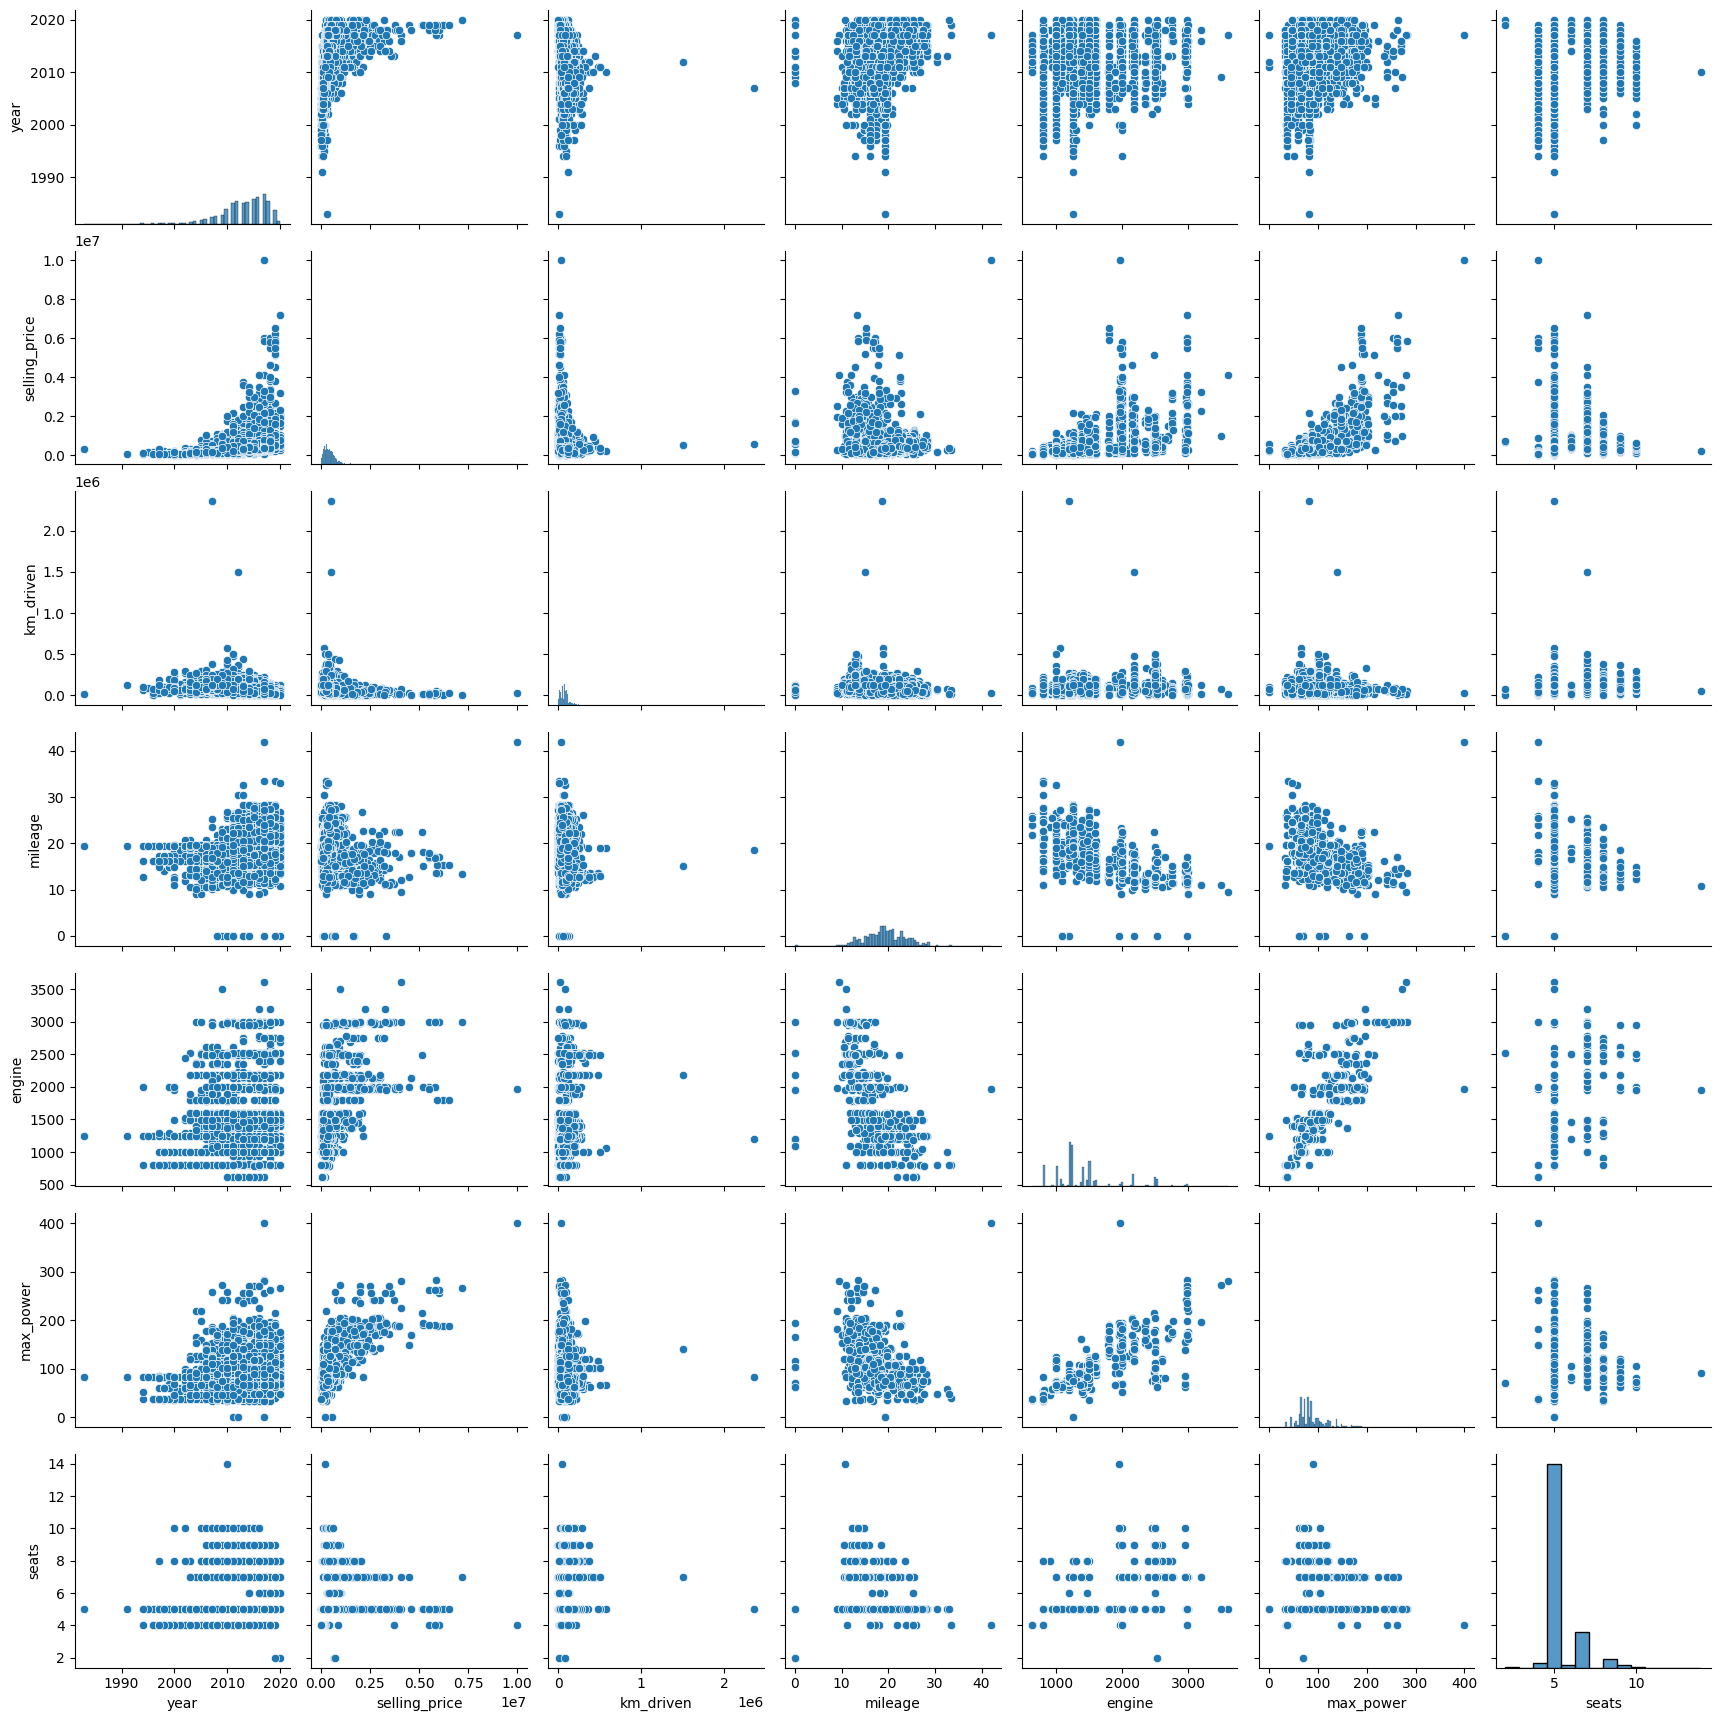

In [154]:
# Воспользуйтесь pairplot из библиотеки seabron, чтобы визуализировать попарные распределения числовых признаков для train
sns.pairplot(df_train.select_dtypes(exclude="object"))
plt.show()

**Можно ли предположить на основе распределений связь признаков с целевой переменной?**
<span style="color: blue;"><i>Попарные распределения дают понимания зависимости с целевой переменной. На графиках видно, например, что чем раньше год выпуска, чем больше пробег - тем меньше цена. </i></span>

**Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?**
<span style="color: blue;"><i>Да, можно, по графику зависимости двигатели и его мощности видна линейная зависимость. Чем больше объем - тем больше мощность</i></span>

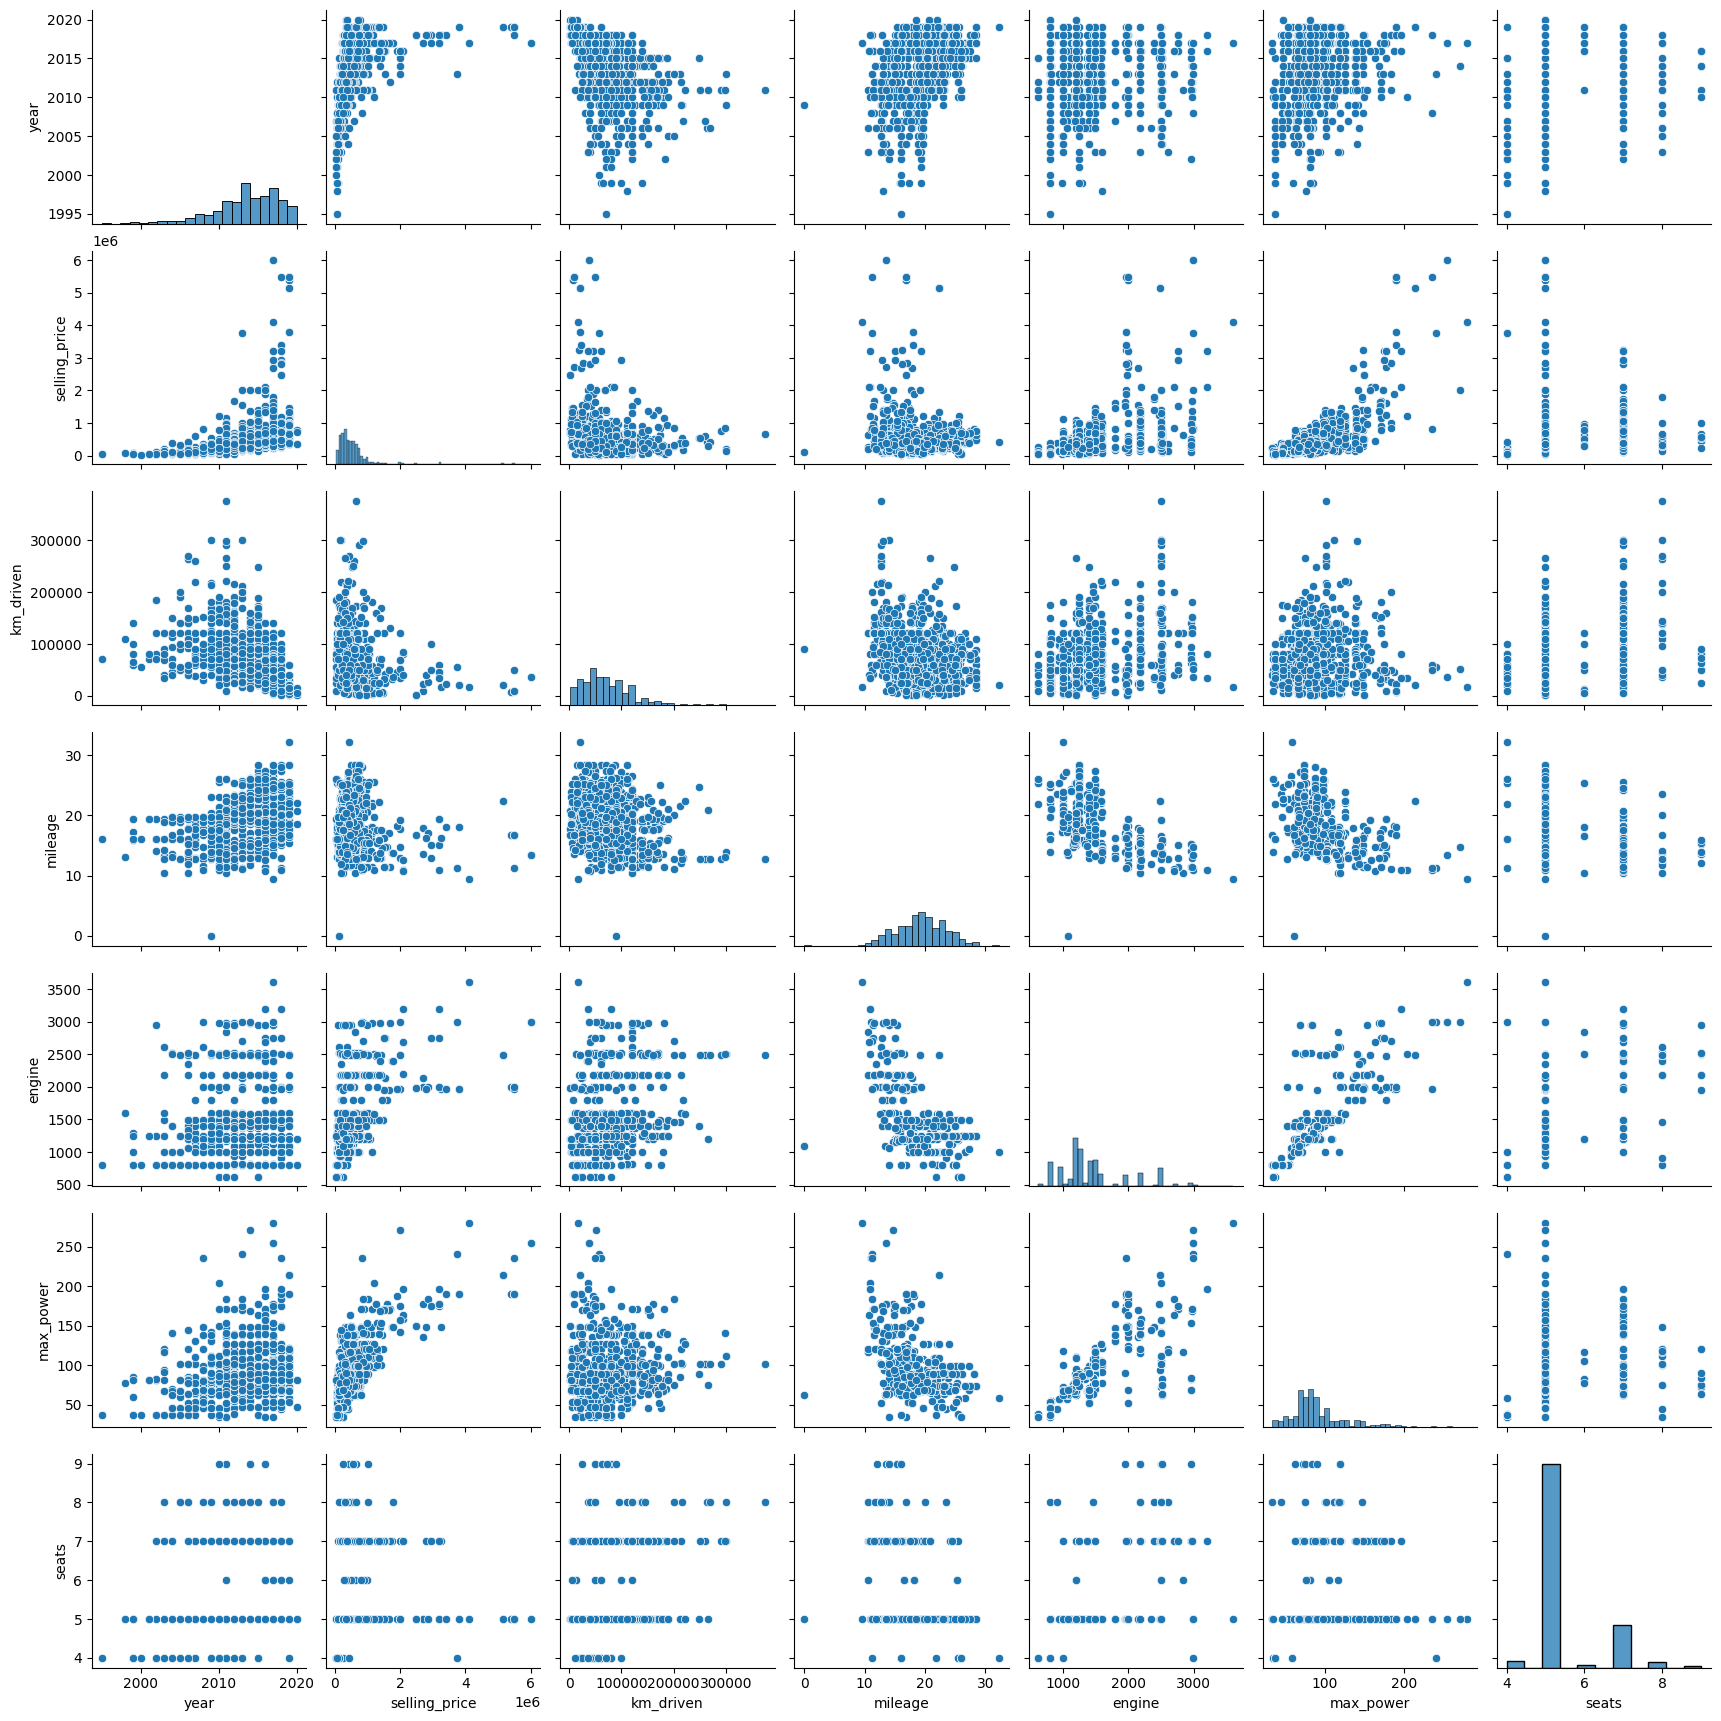

In [155]:
# Постройте pairplot по тестовым данным
sns.pairplot(df_test.select_dtypes(exclude="object"))
plt.show()

**Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"**
<span style="color: blue;"><i>В целом, да, основные распределения остались прежними. В трейне больше данных и больше разнообразных данных в графиках, но формы и зависимости не меняются.</i></span>


### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [156]:
#Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи pd.corr()
df_train_corr = df_train.corr(numeric_only = True)
display(df_train_corr)

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage        0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine         0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power      0.156858       0.692814   0.024588 -0.373390  0.681117   
seats          0.041178       0.149953   0.192328 -0.451059  0.652172   

               max_power     seats  
year            0.156858  0.041178  
selling_price   0.692814  0.149953  
km_driven       0.024588  0.192328  
mileage        -0.373390 -0.451059  
engine          0.681117  0.652172  
max_power       1.000000  0.244112  
seats           0.244112  1.000000

<Axes: >

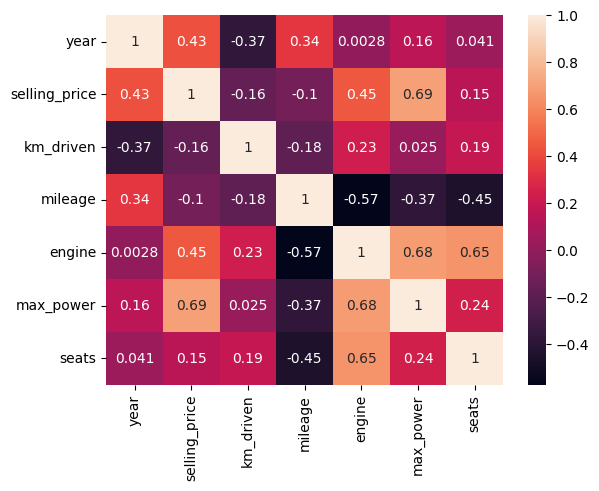

In [157]:
#По полученным корреляциям постройте тепловую карту (heatmap из бибилотеки seaborn)
sns.heatmap(df_train_corr,  annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Ответьте на вопросы:

 **Какие 2 признака наименее скоррелированы между собой?**
 
 <span style="color: blue;"><i>Наименее скоррелированы между собой признаки - Год и Двигатель. Показатель корреляции этих признаков 0.0028 и максимально близок к нулю</i></span>
 
 **Между какими наблюдается довольно сильная положительная линейная зависимость?**
 
 <span style="color: blue;"><i>Сильная зависимость наблюдается между признаками - Двигатель и Мощность, Двигатель и Количество сидений, а также интересно, что набдюдается сильная зависимость между мощностью и ценой</i></span>
 
 **Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?**
 
 <span style="color: blue;"><i>Да, такое утверждение верно. Мы видим обратную зависимость в корреляционной матрице между годом и значением пройденных киллометров</i></span>

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [44]:
#Нас не попросили построить корреляцию нечисловых признаков. Но времени на реализацию корреляций Крамера или Хи-квадрат нет

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [22]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes(exclude="object").drop('selling_price', axis = 1)

In [23]:
# опишите выбранные вещественные признаки
X_train.describe()

year     km_driven      mileage       engine    max_power  \
count  5840.000000  5.840000e+03  5840.000000  5840.000000  5840.000000   
mean   2013.428425  7.395224e+04    19.430841  1429.448973    87.906371   
std       4.095622  6.007114e+04     3.985973   485.662834    31.640418   
min    1983.000000  1.000000e+00     0.000000   624.000000     0.000000   
25%    2011.000000  3.900000e+04    16.950000  1197.000000    68.000000   
50%    2014.000000  7.000000e+04    19.370000  1248.000000    81.860000   
75%    2017.000000  1.000000e+05    22.300000  1498.000000    99.000000   
max    2020.000000  2.360457e+06    42.000000  3604.000000   400.000000   

             seats  
count  5840.000000  
mean      5.426712  
std       0.982344  
min       2.000000  
25%       5.000000  
50%       5.000000  
75%       5.000000  
max      14.000000

In [24]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes(exclude="object").drop('selling_price', axis = 1)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.  <span style="color: blue;"><i>Значения метрики R2 на трейне и на тесте не высокая, модель не очень хорошо предсказывает цены. При этом метрики на трейне и на тесте не сильно разнятся, поэтому можно сказать, что с высокой долей вероятности мы не переобучились</i></span>

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)
#Обучаем модель 

y_predict_train_LR = model.predict(X_train)
y_predict_LR = model.predict(X_test)
#Предсказываем значения для трейна и для теста

r2_test_LR = r2_score(y_test, y_predict_LR)
mse_test_LR = MSE(y_test, y_predict_LR)
#Оценки для теста

r2_train_LR = r2_score(y_train, y_predict_train_LR)
mse_train_LR = MSE(y_train, y_predict_train_LR)
#Оценки для трейна

In [28]:
#Выведем значения метрик
print(round(r2_train_LR, 6), round(mse_train_LR, 2))
print(round(r2_test_LR, 6), round(mse_test_LR, 2))

0.592259 116874153930.03
0.594142 233298779730.45


In [29]:
#Выведем значения коэффициентов
model.coef_

array([ 3.73046278e+04, -7.35171703e-01,  7.23446787e+03,  1.25979854e+02,
        1.02032467e+04, -2.36283023e+04])

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [34]:
from sklearn.preprocessing import StandardScaler

skaler = StandardScaler()
skaler.fit(X_train)
#Обучаем скаллер на трейне

X_train_sk = skaler.transform(X_train)
X_test_sk = skaler.transform(X_test)
#Трансформируем датасеты с помощью скаллера

model2 = LinearRegression()
model2.fit(X_train_sk, y_train)
#Обучаем модель на скалированных данных

y_predict_train_LR2 = model2.predict(X_train_sk)
y_predict_LR2 = model2.predict(X_test_sk)
#Предсказываем значения для трейна и для теста

r2_test_LR2 = r2_score(y_test, y_predict_LR2)
mse_test_LR2 = MSE(y_test, y_predict_LR2)
#Оценки для теста

r2_train_LR2 = r2_score(y_train, y_predict_train_LR2)
mse_train_LR2 = MSE(y_train, y_predict_train_LR2)
#Оценки для трейна

In [35]:
#Выведем значения метрик
print(round(r2_train_LR2, 6), round(mse_train_LR2, 2))
print(round(r2_test_LR2, 6), round(mse_test_LR2, 2))

0.592259 116874153930.03
0.594142 233298779730.45


In [36]:
#Выведем значения коэффициентов
model2.coef_

array([152772.57084581, -44158.81852005,  28833.92577752,  61178.49433685,
       322807.35325923, -23209.132486  ])

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [37]:
# your code here
sk_res = pd.DataFrame(X_train.columns, model2.coef_)
sk_res

0
 152772.570846       year
-44158.818520   km_driven
 28833.925778     mileage
 61178.494337      engine
 322807.353259  max_power
-23209.132486       seats

**Ответ**
 <span style="color: blue;"><i>По данным выше видно, что наиболее информативным в предсказании цены оказался признак max_power</i></span>

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему. <span style="color: blue;"><i>Не занулила. Мало признаков и они все информативные</i></span>

In [38]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

skaler = StandardScaler()
skaler.fit(X_train)
#Обучаем скаллер на трейне

X_train_sk = skaler.transform(X_train)
X_test_sk = skaler.transform(X_test)
#Трансформируем датасеты с помощью скаллера

model3 = Lasso()
model3.fit(X_train_sk, y_train)
#Обучаем модель на скалированных данных

y_predict_train_L1 = model3.predict(X_train_sk)
y_predict_L1 = model3.predict(X_test_sk)
#Предсказываем значения для трейна и для теста

r2_test_L1 = r2_score(y_test, y_predict_L1)
mse_test_L1 = MSE(y_test, y_predict_L1)
#Оценки для теста

r2_train_L1 = r2_score(y_train, y_predict_train_L1)
mse_train_L1 = MSE(y_train, y_predict_train_L1)
#Оценки для трейна

In [39]:
#Выведем значения метрик
print(round(r2_train_L1, 6), round(mse_train_L1, 2))
print(round(r2_test_L1, 6), round(mse_test_L1, 2))

0.592259 116874153940.14
0.594141 233299450599.17


In [40]:
#Выведем значения коэффициентов
model3.coef_

array([152772.3902142 , -44157.68985794,  28832.04339588,  61173.66240922,
       322808.23691947, -23206.25564908])

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей? <span style="color: blue;"><i>50 fits</i></span>
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации? <span style="color: blue;"><i>10. Не занулились, значение весов большое, чтобы веса занулились нужно более высокое значение alpha</i></span> 

In [41]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso(max_iter=10000, random_state = 42)

params = {'alpha' : [0.01, 0.1, 0.5, 1, 10]}
grid = GridSearchCV(estimator=lasso, param_grid=params, cv=10, scoring="neg_mean_squared_error", verbose=3)
grid.fit(X_train_sk, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END ...........alpha=0.01;, score=-312959901051.406 total time=   0.0s
[CV 2/10] END ............alpha=0.01;, score=-75841938055.216 total time=   0.0s
[CV 3/10] END ............alpha=0.01;, score=-93191560641.712 total time=   0.0s
[CV 4/10] END ............alpha=0.01;, score=-97559495472.581 total time=   0.0s
[CV 5/10] END ............alpha=0.01;, score=-73500245165.536 total time=   0.0s
[CV 6/10] END ...........alpha=0.01;, score=-111615717799.990 total time=   0.0s
[CV 7/10] END ...........alpha=0.01;, score=-187385362883.847 total time=   0.0s
[CV 8/10] END ............alpha=0.01;, score=-79980887089.168 total time=   0.0s
[CV 9/10] END ............alpha=0.01;, score=-57452532322.542 total time=   0.0s
[CV 10/10] END ..........alpha=0.01;, score=-123678383295.344 total time=   0.0s
[CV 1/10] END ............alpha=0.1;, score=-312959996216.959 total time=   0.0s
[CV 2/10] END .............alpha=0.1;, score=-75

GridSearchCV(cv=10, estimator=Lasso(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]},
             scoring='neg_mean_squared_error', verbose=3)

In [42]:
# your code here
y_predict_grid_train_L1 = grid.predict(X_train_sk)
y_predict_grid_L1 = grid.predict(X_test_sk)
#Предсказываем значения для трейна и для теста

r2_test_grid_L1 = r2_score(y_test, y_predict_grid_L1)
mse_test_grid_L1 = MSE(y_test, y_predict_grid_L1)
#Оценки для теста

r2_train_grid_L1 = r2_score(y_train, y_predict_grid_train_L1)
mse_train_grid_L1 = MSE(y_train, y_predict_grid_train_L1)
#Оценки для трейна

In [43]:
#Выведем значения метрик
print(round(r2_train_grid_L1, 6), round(mse_train_grid_L1, 2))
print(round(r2_test_grid_L1, 6), round(mse_test_grid_L1, 2))

0.592259 116874154940.68
0.59413 233305498918.34


In [44]:
#Выведем значения коэффициентов
grid.best_estimator_.coef_

array([152770.45018468, -44147.60879979,  28815.43484952,  61130.13080678,
       322816.34534629, -23180.19532462])

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей? <span style="color: blue;"><i>500 fits</i></span>
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей? <span style="color: blue;"><i>alpha = 0.1, L1_ratio = 0.9 </i></span>

In [45]:
from sklearn.linear_model import ElasticNet

ElasticN = ElasticNet(max_iter=10000, random_state = 42)

params = {'alpha' : [0.01, 0.1, 0.5, 1, 10], 'l1_ratio' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid = GridSearchCV(estimator=ElasticN, param_grid=params, cv=10, scoring="neg_mean_squared_error", verbose=3)
grid.fit(X_train_sk, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END alpha=0.01, l1_ratio=0.1;, score=-315050752241.043 total time=   0.0s
[CV 2/10] END alpha=0.01, l1_ratio=0.1;, score=-75340477097.176 total time=   0.0s
[CV 3/10] END alpha=0.01, l1_ratio=0.1;, score=-92984770661.322 total time=   0.0s
[CV 4/10] END alpha=0.01, l1_ratio=0.1;, score=-97308867040.932 total time=   0.0s
[CV 5/10] END alpha=0.01, l1_ratio=0.1;, score=-72831419981.431 total time=   0.0s
[CV 6/10] END alpha=0.01, l1_ratio=0.1;, score=-111797575263.134 total time=   0.0s
[CV 7/10] END alpha=0.01, l1_ratio=0.1;, score=-187490703736.842 total time=   0.0s
[CV 8/10] END alpha=0.01, l1_ratio=0.1;, score=-79644835373.762 total time=   0.0s
[CV 9/10] END alpha=0.01, l1_ratio=0.1;, score=-56862270970.022 total time=   0.0s
[CV 10/10] END alpha=0.01, l1_ratio=0.1;, score=-123592447990.857 total time=   0.0s
[CV 1/10] END alpha=0.01, l1_ratio=0.2;, score=-314820470666.103 total time=   0.0s
[CV 2/10] END alph

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             scoring='neg_mean_squared_error', verbose=3)

In [46]:
y_predict_grid_train_L12 = grid.predict(X_train_sk)
y_predict_grid_L12 = grid.predict(X_test_sk)
#Предсказываем значения для трейна и для теста

r2_test_grid_L12 = r2_score(y_test, y_predict_grid_L12)
mse_test_grid_L12 = MSE(y_test, y_predict_grid_L12)
#Оценки для теста

r2_train_grid_L12 = r2_score(y_train, y_predict_grid_train_L12)
mse_train_grid_L12 = MSE(y_train, y_predict_grid_train_L12)
#Оценки для трейна

In [47]:
#Выведем значения метрик
print(round(r2_train_grid_L12, 6), round(mse_train_grid_L12, 2))
print(round(r2_test_grid_L12, 6), round(mse_test_grid_L12, 2))

0.592205 116889619199.95
0.591943 234562589441.86


In [48]:
#Выведем значения коэффициентов
grid.best_estimator_.coef_

array([152194.5622696 , -44494.70158783,  28185.63808657,  64293.89982816,
       317540.26750244, -23919.88239655])

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [49]:
#Удаляем название у столбца на трейне и на тесет
df_train = df_train.drop('name', axis = 1)
df_test = df_test.drop('name', axis = 1)

In [50]:
cols = df_train.select_dtypes(include="object").columns.tolist()

X_train_cat = pd.concat([X_train, df_train.select_dtypes(include="object")], axis=1)
X_test_cat = pd.concat([X_test, df_test.select_dtypes(include="object")], axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [51]:
assert X_train_cat.shape == (5840, 10)

In [52]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:

#Тут важно сделать reindex, колонки в сетах соответствовали
X_test_OHE = X_test_OHE.reindex(columns=X_train_OHE.columns, fill_value=0)

In [72]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

#поменяем тим seats на текстовый, чтобы get_dummies сработал автоматически
X_train_cat['seats'] = X_train_cat['seats'].astype('string')
X_test_cat['seats'] = X_test_cat['seats'].astype('string')

#Получим сеты с категориальными признаками
X_train_OHE = pd.get_dummies(X_train_cat, drop_first=True)
X_test_OHE = pd.get_dummies(X_test_cat, drop_first=True)

#Тут важно сделать reindex, колонки в сетах соответствовали
X_test_OHE = X_test_OHE.reindex(columns=X_train_OHE.columns, fill_value=0)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов? <span style="color: blue;"><i>Да, удалось, примерно на 0,05 </i></span>

In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge(max_iter=10000, random_state = 42)

params = {'alpha' : [0.01, 0.1, 0.5, 1, 10]}
grid = GridSearchCV(estimator=ridge, param_grid=params, cv=10, scoring="neg_mean_squared_error", verbose=3)
grid.fit(X_train_OHE, y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END ...........alpha=0.01;, score=-282896525955.101 total time=   0.0s
[CV 2/10] END ............alpha=0.01;, score=-60865626442.687 total time=   0.0s
[CV 3/10] END ............alpha=0.01;, score=-82285439254.297 total time=   0.0s
[CV 4/10] END ............alpha=0.01;, score=-89733250040.151 total time=   0.0s
[CV 5/10] END ............alpha=0.01;, score=-64391595274.037 total time=   0.0s
[CV 6/10] END ............alpha=0.01;, score=-91620929544.622 total time=   0.0s
[CV 7/10] END ...........alpha=0.01;, score=-153695736200.977 total time=   0.0s
[CV 8/10] END ............alpha=0.01;, score=-89442763067.449 total time=   0.0s
[CV 9/10] END ............alpha=0.01;, score=-45935409997.092 total time=   0.0s
[CV 10/10] END ..........alpha=0.01;, score=-119449357267.573 total time=   0.0s
[CV 1/10] END ............alpha=0.1;, score=-282731344119.908 total time=   0.0s
[CV 2/10] END .............alpha=0.1;, score=-60

GridSearchCV(cv=10, estimator=Ridge(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10]},
             scoring='neg_mean_squared_error', verbose=3)

In [55]:
y_predict_grid_train_L2 = grid.predict(X_train_OHE)
y_predict_grid_L2 = grid.predict(X_test_OHE)
#Предсказываем значения для трейна и для теста

r2_test_grid_L2 = r2_score(y_test, y_predict_grid_L2)
mse_test_grid_L2 = MSE(y_test, y_predict_grid_L2)
#Оценки для теста

r2_train_grid_L2 = r2_score(y_train, y_predict_grid_train_L2)
mse_train_grid_L2 = MSE(y_train, y_predict_grid_train_L2)
#Оценки для трейна

In [56]:
#Выведем значения метрик
print(round(r2_train_grid_L2, 6), round(mse_train_grid_L2, 2))
print(round(r2_test_grid_L2, 6), round(mse_test_grid_L2, 2))

0.653778 99240436257.83
0.641532 206057763501.86


In [57]:
#Выведем значения коэффициентов
grid.best_estimator_.coef_

array([ 3.61242155e+04, -5.07676279e-01,  8.24918792e+03,  7.65868057e+01,
        9.14358652e+03, -2.25154689e+04,  1.63375572e+04,  4.47431399e+05,
       -9.07977464e+04, -1.47502271e+05, -8.27819035e+04, -4.10578430e+04,
       -4.14159329e+04,  1.85445123e+04,  1.15253056e+05, -3.65217102e+04,
       -1.11479980e+05, -9.74212103e+04, -2.90107750e+05, -3.73518816e+04,
       -5.31484881e+04,  9.35714499e+05, -3.63078253e+04])

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [70]:
def business_metric(y_true, y_pred):
    err = abs(y_pred - y_true) / y_true  <= 0.10
    correct = len(y_pred[err])
    total = len(y_pred)
    return correct/total

print("LinearRegression:", business_metric(y_test, y_predict_LR))
print("LinearRegression со скалером:", business_metric(y_test, y_predict_LR2))
print("Lasso со скалером:", business_metric(y_test, y_predict_L1))
print("Lasso со скалером и GridSearchCV:", business_metric(y_test, y_predict_grid_L1))
print("ElasticNet со скалером и GridSearchCV:", business_metric(y_test, y_predict_grid_L12))
print("Ridge на числовых + OHE:", business_metric(y_test, y_predict_grid_L2))

LinearRegression: 0.227
LinearRegression со скалером: 0.227
Lasso со скалером: 0.227
Lasso со скалером и GridSearchCV: 0.227
ElasticNet со скалером и GridSearchCV: 0.225
Ridge на числовых + OHE: 0.246


`Your answer here`
<span style="color: blue;"><i>Наибольшее значение расчитанных моделей дает Ridge на числовых и качественных параметрах с OHE, поэтому лучшее решение для бизнеса будет давайть эта модель. Но с точки зрения бизнеса предсказательная способность моделей достаточно низкая и вряд ли ее можно использовать для целей</i></span>

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.